# Black Body Radiation
Authors:  A + B



In [3]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

# Introduction

Objects with temperatures larger than absolute zero ( 0 K or -273.15 °C) emit energy in terms of electromagnetic radiation. This is the phenomenon of blackbody radiation. Black bodies are idealized objects that perfectly absorb incident radiation of any frequency and angle of incidence. They do not reflect any light, nor do they allow any light to pass through it. That is why black bodies appear black at room temperature. In contrast, a white body would reflect all incident radiation uniformly in all directions (add some references).

In thermal equilibrium, that is at a constant temperature, black bodies emit electromagnetic radiation. The emission spectrum of this black body radiation follows Planck's law and is solely determined by the object's temperature. Shape or composition of a black body has no impact on its emission spectrum. With increasing temperature blackbodies emit more light at all wavelengths. This means, when comparing two blackbodies, the hotter one will always emit more light than the cooler one, regardless of the wavelength.

The emission spectrum of a blackbody is continuous and peaks at a specific wavelength, at which the intensity of the spectrum is maximal. This peak wavelength of the blackbody radiation shifts to shorter wavelengths for hotter objects. 
In terms of visible light, the hotter a blackbody is the bluer the peak wavelength of its emission will be.

A detailed explanation of the blackbody radiation requires knowledge on quantum mechanics as pioneered by Max Planck in 1900. A full quantum mechanical description of the black body phenomenon is beyond the scope of this workshop.

In reality, there exists no ideal blackbody, but many objects like light bulbs, candles, hot metal or lava behave approximately like black bodies.

The black body radiation has particular relevance for cosmology and astrophysics. One of the best measurements of a naturally occurring black body emission spectrum was obtained by ESA's Planck satellite mission, which observed the cosmic microwave background radiation, a relic radiation of the hot big bang from the beginning of our Universe.
Also, the emission spectrum of stars, which are hot luminous spheroids of gaseous plasma, can be approximated by a Planck law.

In the course of this workshop, we want to use the phenomenon of blackbody radiation to make sense of astrophysical observations. 



# Discovering Wien's displacement law

At the beginning of the 20th-century studies of blackbodies revealed new insights into the interaction between matter and radiation and triggered a revolution: The development of quantum mechanics. Modern technical advances, such as LASER technology or modern semiconductors for computers exploit the principles of quantum mechanics which have first been investigated by Planck, Bohr, Heisenberg and others. The discovery and understanding of the blackbody radiation, therefore, played an important role in modern science, technology and our society.   

In the context of astronomy and cosmology, black body radiation can be used to study features of observed celestial objects like stars or galaxies.

Despite its complex quantum mechanical origin, the blackbody emission spectrum exhibits some simple features.

As stated above, the blackbody emission spectrum follows a continuous Planck law, which is solely determined by a single temperature. With increasing temperature the overall radiated energy increases and the peak of the emission spectrum moves to shorter wavelengths. Therefore the hotter a blackbody will be, the bluer the peak wavelength will appear.  

In consequence there exists a unique relation between the temperature and the peak wavelength of a blackbody emission spectrum.

As a first task we seek to discover this universal relationship between temperature and peak wavelength.


## How are temperature and peak wavelength related for blackbody radiation?



/Users/jens/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


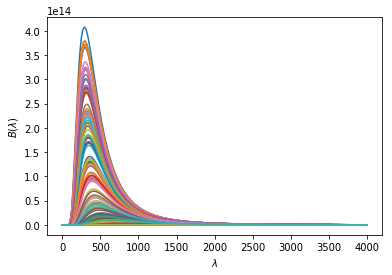

In [4]:
h = 6.626e-34
c = 3.0e+8
k = 1.38e-23

def planck(wav, T):
    a = 2.0*h*c**2
    b = h*c/(wav*k*T)
    intensity = a/ ( (wav**5) * (np.exp(b) - 1.0) )
    return intensity

# generate x-axis in increments from 1nm to 3 micrometer in 1 nm increments
# starting at 1 nm to avoid wav = 0, which would result in division by zero.
wavelengths = np.arange(1e-9, 4e-6, 1e-10) 

#generate 10 temperatures

intensity=[]
Temp=[]
ntemp=200
for i in range(ntemp):
    T = np.random.uniform(1000,10000,1)[0]
    B = planck(wavelengths, T)
    intensity.append(B)
    Temp.append(T)
    plt.plot(wavelengths*1e9, B) 
    plt.ylabel(r'$B(\lambda)$')
    plt.xlabel(r'$\lambda$')


# show the plot
plt.show()

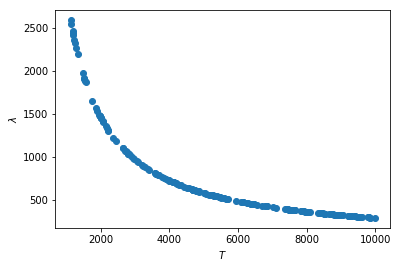

In [5]:
#get maximum
lmax=[]
Tmax=[]
for i in range(ntemp):
    l = np.argmax(intensity[i])
    lmax.append(wavelengths[l]*1e9)
    Tmax.append(Temp[i])

    
plt.scatter(np.array(Tmax),np.array(lmax))
plt.xlabel(r'$T$')
plt.ylabel(r'$\lambda$')
plt.show()

# Measure the Temperature of the sun


<img src="https://www.esa.int/var/esa/storage/images/esa_multimedia/images/2000/11/soho_image_of_the_sun/9227898-5-eng-GB/SOHO_image_of_the_Sun_node_full_image_2.gif" width="40%">


<div style="text-align: justify"> 
<p>
The International Space Station (ISS) has tracked our sun to measure its energy for almost a decade now. 
In particular the Solspec instrument, part of the solar package aboard the ISS has measured the energy at different wavelength in the optical spectrum to high accuracy. Launched together with the European Columbus space laboratory in 2008 it has tracked the Sun until it was shut down this year. 
</p>
<p>
The Solspec instrument provides us with a very accurate reference measurement of the spectrum of our sun.
</p>
</br>
In the following you should use this spectrum and the results of the Wien's displacement law to estimate the temperature of our sun.  

</div>


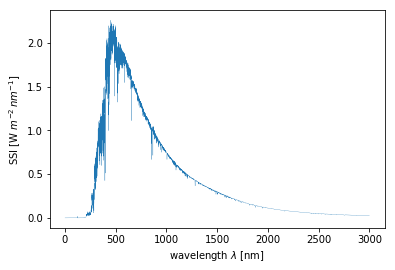

In [6]:
x,y=np.loadtxt('./data/solar_reference_spectrum_2018.dat', usecols=[0,1], unpack=True)

plt.plot(x,y,lw=0.25)
plt.xlabel(r'wavelength $\lambda$ [nm]')
plt.ylabel(r'SSI [W $m^{-2}\, nm^{-1}$]')
plt.show()

In [10]:
T_sun = Tmax[10]*lmax[10]/500.00
print('T_sun =',T_sun)

T_sun = 5802.248731118041


# References